In [4]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Dữ liệu mẫu
documents = [
    "Đà_Nẵng nổi_tiếng với những bãi_biển đẹp và món_ăn đặc_sản.",
    "Giày thể_thao luôn được ưa_chuộng vì sự tiện_lợi và thời_trang hiện_đại.",
    "Chế_độ ăn_uống hợp_lý là yếu_tố quan_trọng để duy_trì sức_khỏe lâu_dài.",
    "Cầu_thủ Messi thể_hiện phong_độ xuất_sắc trong trận_chung_kết Cúp_C1 châu_Âu.",
    "Sử_dụng các ứng_dụng học_tập trực_tuyến giúp sinh_viên học_tập hiệu_quả hơn.",
    "Chạy_bộ vào sáng_sớm không chỉ giúp cơ_thể khỏe_mạnh mà còn giảm_stress.",
    "Hà_Nội có rất_nhiều danh_lam_thắng_cảnh thu_hút du_khách khắp_nơi.",
    "Thời_trang mùa_đông năm_nay lại tập_trung vào màu_sắc ấm áp và chất_liệu dày_dặn.",
    "Nhiều bạn trẻ hiện_nay thích khám_phá các địa_điểm du_lịch ở miền_Nam.",
    "Giáo_dục trực_tuyến trở_thành xu_hướng khi công_nghệ hỗ_trợ giảng_dạy từ xa.",
    "Chế_độ_dinh_dưỡng giúp cải_thiện vóc_dáng và tăng cường hệ_thống miễn_dịch.",
    "Mùa_hè này, nhiều du_khách lựa_chọn đi_du_lịch biển để thư_giãn và nghỉ_ngơi.",
    "Việc học tập với các khóa_học trực_tuyến giúp tiết_kiệm thời_gian và chi_phí.",
    "Nhiều phụ_nữ hiện_nay ưa_thích thời_trang tối giản với những bộ đồ thanh_lịch.",
    "Hồ_Chí_Minh là thành_phố có sự pha_trộn giữa hiện_đại và truyền_thống trong kiến_trúc.",
    "Vật_lý và toán_học luôn là những môn học yêu_thích của học_sinh đam_mê khoa_học.",
    "Khi đi_du_lịch, bạn cần chuẩn_bị kỹ_lưỡng từ vé máy_bay đến các điểm_đến du_lịch.",
    "Du_lịch sinh_thái là xu_hướng hiện_nay vì mọi_người quan_tâm đến bảo_vệ môi_trường.",
    "Thời_trang nam giới năm nay có xu_hướng theo đuổi phong_cách năng_động và thoải_mái."
]

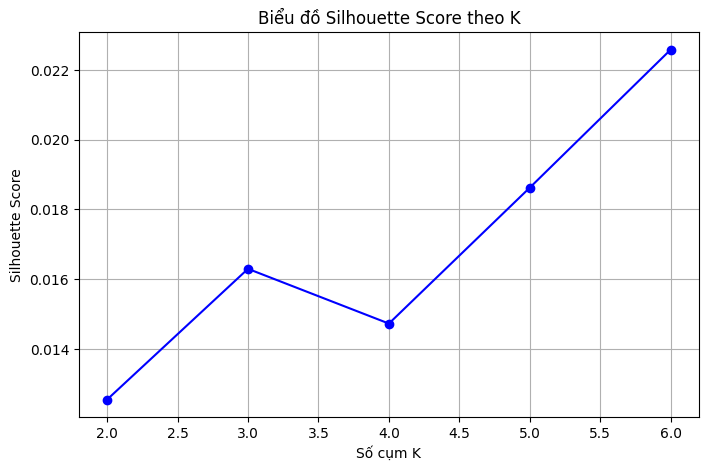

In [5]:
# Vector hóa dữ liệu bằng TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Danh sách K để thử nghiệm
K_values = range(2, 7)
silhouette_scores = []

# Thử nghiệm các giá trị K
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Số cụm K")
plt.ylabel("Silhouette Score")
plt.title("Biểu đồ Silhouette Score theo K")
plt.grid(True)
plt.show()

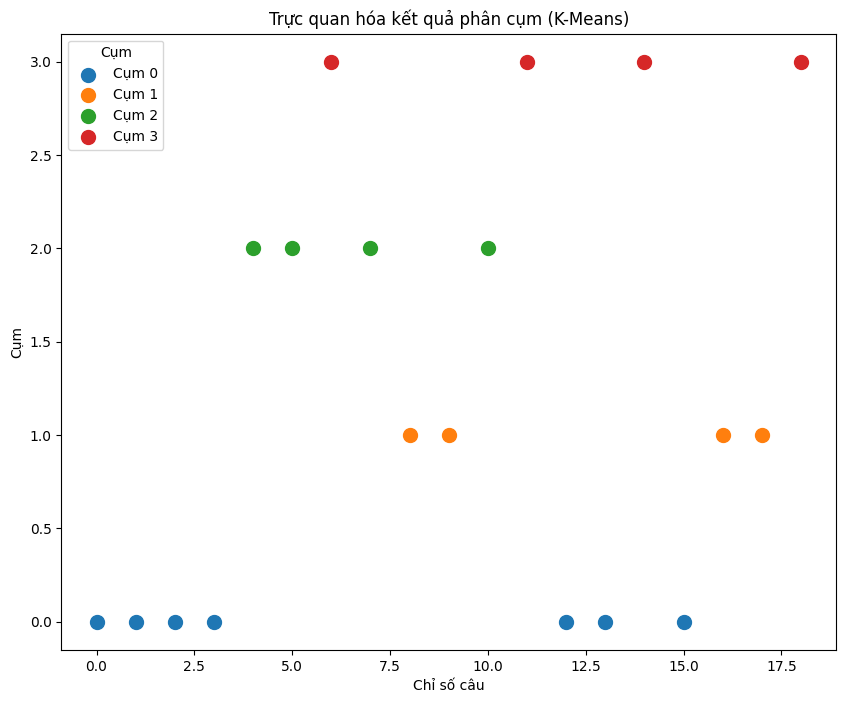

In [6]:
# Bước 2: Áp dụng thuật toán K-Means với K=4
K = 4
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Bước 3: Trực quan hóa kết quả bằng biểu đồ scatter plot
plt.figure(figsize=(10, 8))
for i in range(K):
    # Lấy chỉ số của các tài liệu thuộc cụm i
    cluster_points = np.where(labels == i)[0]
    # Vẽ biểu đồ điểm cho mỗi cụm
    plt.scatter(cluster_points, np.zeros_like(cluster_points) + i, label=f"Cụm {i}", s=100, marker="o")

plt.xlabel("Chỉ số câu")
plt.ylabel("Cụm")
plt.title("Trực quan hóa kết quả phân cụm (K-Means)")
plt.legend(title="Cụm", loc="best")
plt.show()
